In [1]:
# IMPORTANTE! FUNÇÃO PARA CALCULAR O NUMERO IDEAL DE CLUSTERS DO KMEANS
#

In [2]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
print('Bibliotecas importadas!')

Bibliotecas importadas!


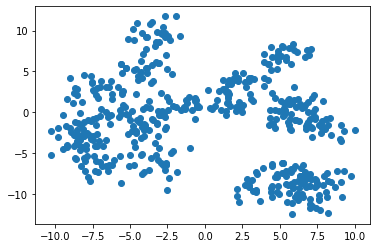

In [3]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
teste = make_blobs(n_samples=500, centers=20, random_state=999)
#teste

In [5]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1


In [6]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
n = optimal_number_of_clusters(wcss)
print('Números de clusters ideais:',n)

Números de clusters ideais: 4


In [7]:
wcss

[31547.372471390485,
 16949.214472147927,
 9464.847250570496,
 6005.101775346179,
 4717.404091931214,
 3667.860593372465,
 2993.8869562393684,
 2490.8650903123416,
 2061.628647493931,
 1841.19600847729,
 1661.6988788520775,
 1491.3747458409425,
 1303.6272964322573,
 1165.587976163055,
 1061.7615492628918,
 991.2956639299284,
 909.6803784188811,
 852.9146752502247,
 783.7202904880846]

In [8]:
#plt.plot(range(1, 20), wcss)

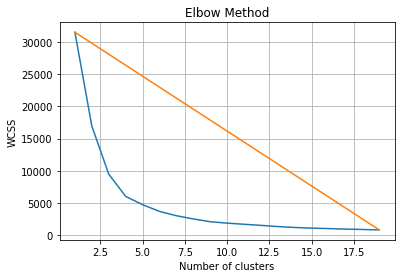

In [9]:
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

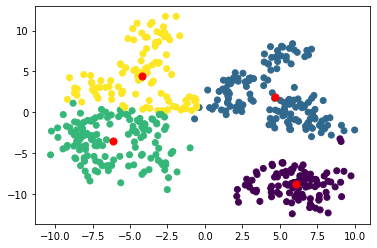

In [23]:
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=50,c='red')
plt.show()


In [29]:
kmeans.cluster_centers_

array([[ 6.07279058, -8.8012785 ],
       [ 4.6799272 ,  1.81951975],
       [-6.10635026, -3.5270784 ],
       [-4.18061418,  4.39438299]])

In [30]:
wcss[0] # 1 cluster soma dos quadrados intra-clusters 

31547.372471390485

In [31]:
wcss[4] # 5 clusters soma dos quadrados intra-clusters 

4717.404091931214

In [32]:
wcss

[31547.372471390485,
 16949.214472147927,
 9464.847250570496,
 6005.101775346179,
 4717.404091931214,
 3667.860593372465,
 2993.8869562393684,
 2490.8650903123416,
 2061.628647493931,
 1841.19600847729,
 1661.6988788520775,
 1491.3747458409425,
 1303.6272964322573,
 1165.587976163055,
 1061.7615492628918,
 991.2956639299284,
 909.6803784188811,
 852.9146752502247,
 783.7202904880846]